# Q2. Explain GET and POST methods.

# Answer:
## GET and POST are two HTTP methods used to communicate with a web server to retrieve or send data. Here's how they work:

### 1. GET method:
GET is a request method used to retrieve data from the server. When you use a web browser to visit a web page, you are sending a GET request to the server, which then responds by sending back the requested data. The data can be in the form of HTML, XML, JSON, or other formats.

Some characteristics of the GET method are:

It is a safe and idempotent method, meaning that it does not modify the server's state and can be repeated multiple times without causing side effects.
The data is sent in the URL query string, which is visible in the browser's address bar and can be bookmarked or shared.
The amount of data that can be sent is limited by the maximum length of the URL, typically around 2048 characters.
Some common use cases for the GET method are:

Retrieving a web page or a specific resource (such as an image or a file) from a server.
Searching for data in a database or an API by providing query parameters in the URL.
Providing navigation links or pagination controls in a web application.

### 2. Post Method
POST is a request method used to send data to the server. When you submit a web form or upload a file, you are sending a POST request to the server, which then processes the data and responds with a status code and possibly a message or a redirection.

Some characteristics of the POST method are:

* It is not a safe or idempotent method, meaning that it can modify the server's state and may have side effects.
* The data is sent in the body of the request, which is not visible in the browser's address bar and cannot be bookmarked or shared.
* The amount of data that can be sent is not limited by the URL length, but it may be limited by the server's configuration or the client's network.

Some common use cases for the POST method are:

* Creating a new resource on the server, such as a new user account, a new blog post, or a new order.
* Updating an existing resource on the server, such as changing the password of a user account or editing a blog post.
* Submitting a large amount of data that cannot be sent via the URL, such as a file upload or a form with many fields.

# Q2. Why is request used in Flask?

# Answer :

### Request is used in Flask to handle incoming HTTP requests from clients such as web browsers or mobile applications.

When a client sends an HTTP request to a Flask application, the request data is sent to the server as part of the HTTP message. The request can contain various data such as parameters, headers, cookies, and form data, depending on the type of request.

The Flask request object provides a way to access and manipulate the data of an incoming request. It is a global object that can be imported from the flask module and used in Flask view functions to extract information from the request.

Here are some of the functionalities provided by the Flask request object:

1. Accessing the request method (GET, POST, etc.), URL, headers, and cookies.
2. Retrieving the values of query parameters and form data submitted by the client.
3. Uploading files sent by the client and saving them on the server.
4. Handling sessions and user authentication.

In summary, the Flask request object is an essential part of Flask web development, as it allows developers to interact with incoming client requests and extract the necessary data to provide an appropriate response.

# Q3. Why is redirect() used in Flask?

# Answer:

### The redirect() function in Flask is used to redirect the user's request to a different URL. It is a common practice to use a redirect when a user submits a form or when a user tries to access a restricted page without being logged in.

Here are a few use cases where redirect() can be useful in Flask:

1. After a successful login: When a user logs in successfully, it's common to redirect them to a dashboard or a landing page. This can be achieved using the redirect() function.

2. After submitting a form: If a user submits a form and the data needs to be processed before displaying the result, a redirect can be used to display the result on a different page.

3. Redirecting unauthorized access: If a user tries to access a restricted page without being logged in, they can be redirected to a login page using the redirect() function.

4. Redirecting after a post request: When a user makes a POST request to a URL, it's common to redirect them to a different page using the redirect() function, so that they don't accidentally make the same request again by refreshing the page.

In summary, redirect() is a useful function in Flask for redirecting users to different pages, and it's commonly used in many web applications to control the flow of user requests.

# Q4. What are templates in Flask? Why is the render_template() function used?

## Answer:

### In Flask, templates are used to create dynamic HTML pages. Templates are essentially HTML files that include placeholders for dynamic content. When a user requests a page, Flask populates the placeholders with the appropriate content and sends the complete HTML page to the user's browser.

### The render_template() function is used to render templates in Flask. This function takes the name of the template file (e.g., index.html) as an argument, and any additional data that needs to be passed to the template. It then returns the rendered HTML content as a string, which can be sent back to the user's browser as a response.

# Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

## Answer:

### I'm creating an API to give quadratic equation $a.x^2 + b.x + c = 0$ to solve

### Inputs provided by user through postman will be a,b and c

### Roots of equation are: $ x = (-b ± √(b² - 4ac)) / 2a $

### Below is the code for my Quadratic Equation Solver:

### Link to my HTML Template : [quadratic.html](./templates/quadratic.html)


In [3]:
from flask import Flask,request,render_template,jsonify

app = Flask(__name__)


@app.route('/',methods = ['GET','POST'])
def quadratic_eq():
    if request.method == 'POST':
        a = float(request.form['a'])
        b = float(request.form['b'])
        c = float(request.form['c'])
        delta = (b**2) - 4*a*c
        
        if delta <0:
            result = f"The quadratic equation : {a}*x^2 + {b}*x + {c} has no real roots."
            
        elif delta == 0:
            x = (-b)/(2*a)
            result = f"The quadratic equation : {a}*x^2 + {b}*x + {c} has one real root: {str(x)}"
        else:
            x1 = (-b + delta**(1/2)) / (2*a)
            x2 = (-b - delta**(1/2)) / (2*a)
            result = f"The quadratic equation {a}*x^2 + {b}*x + {c} has two real roots: {str(x1)} and {str(x2)}"
        return render_template("quadratic.html", result = result)
    else:
        return render_template("quadratic.html")
    
    
    
@app.route('/quadratic_postman',methods=['POST'])
def quadratic_solver_postman():
    if request.method == 'POST':
        a = float(request.json['a'])
        b = float(request.json['b'])
        c = float(request.json['c'])
        delta = (b**2) - 4*a*c
        if delta < 0:
            result = f"The quadratic equation : {a}*x^2 + {b}*x + {c} has no real roots."
        elif delta == 0:
            x = (-b) / (2*a)
            result = f"The quadratic equation : {a}*x^2 + {b}*x + {c} has one real root: {str(x)}"
        else:
            x1 = (-b + delta**(1/2)) / (2*a)
            x2 = (-b - delta**(1/2)) / (2*a)
            result = f"The quadratic equation {a}*x^2 + {b}*x + {c} has two real roots: {str(x1)} and {str(x2)}"
        
    return jsonify(result)


if __name__ == "__main__":
    app.run(host="0.0.0.0")

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.180.143:5000
Press CTRL+C to quit
127.0.0.1 - - [30/Jul/2023 00:19:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jul/2023 00:19:45] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [30/Jul/2023 00:20:47] "POST / HTTP/1.1" 200 -


### Below is screenshot of my Flask App Homepage

![Screenshot 2023-07-30 002054.png](<attachment:Screenshot 2023-07-30 002054.png>)
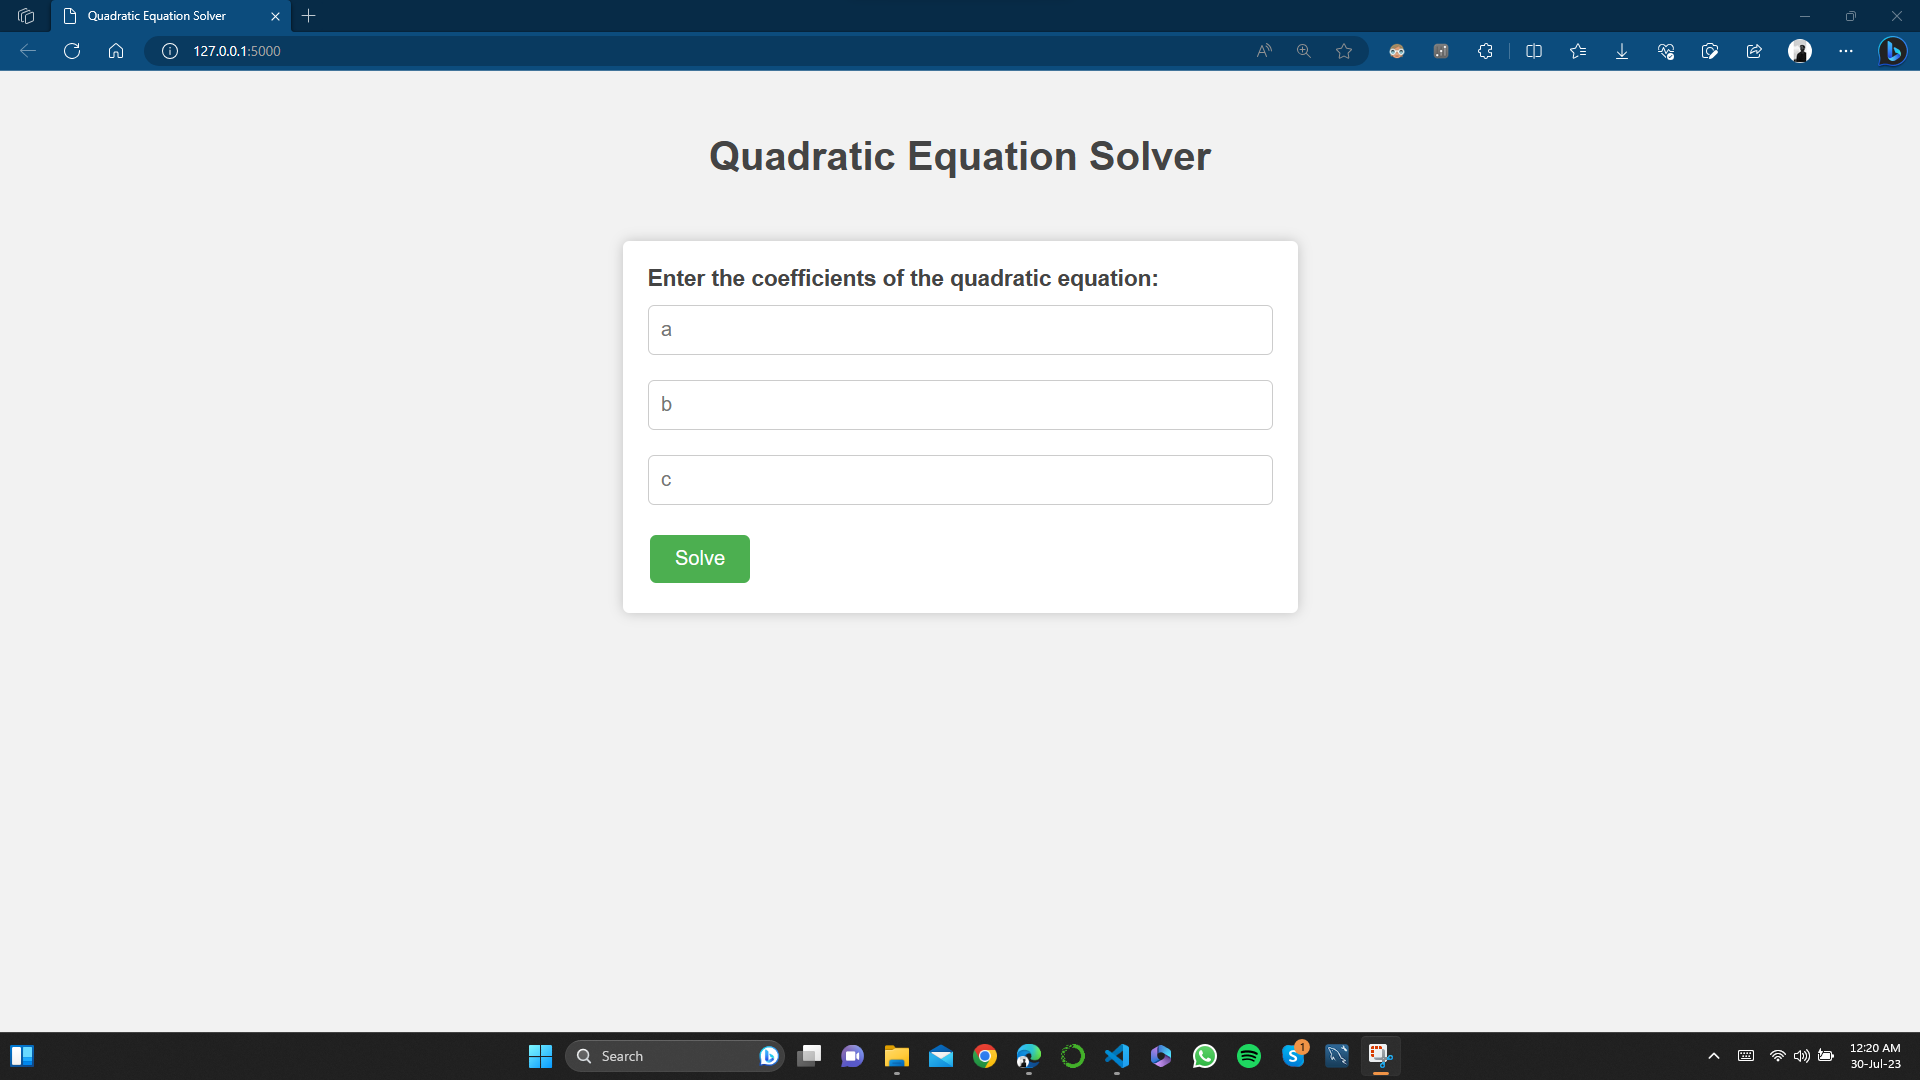

![Screenshot 2023-07-30 002111.png](<attachment:Screenshot 2023-07-30 002111.png>)
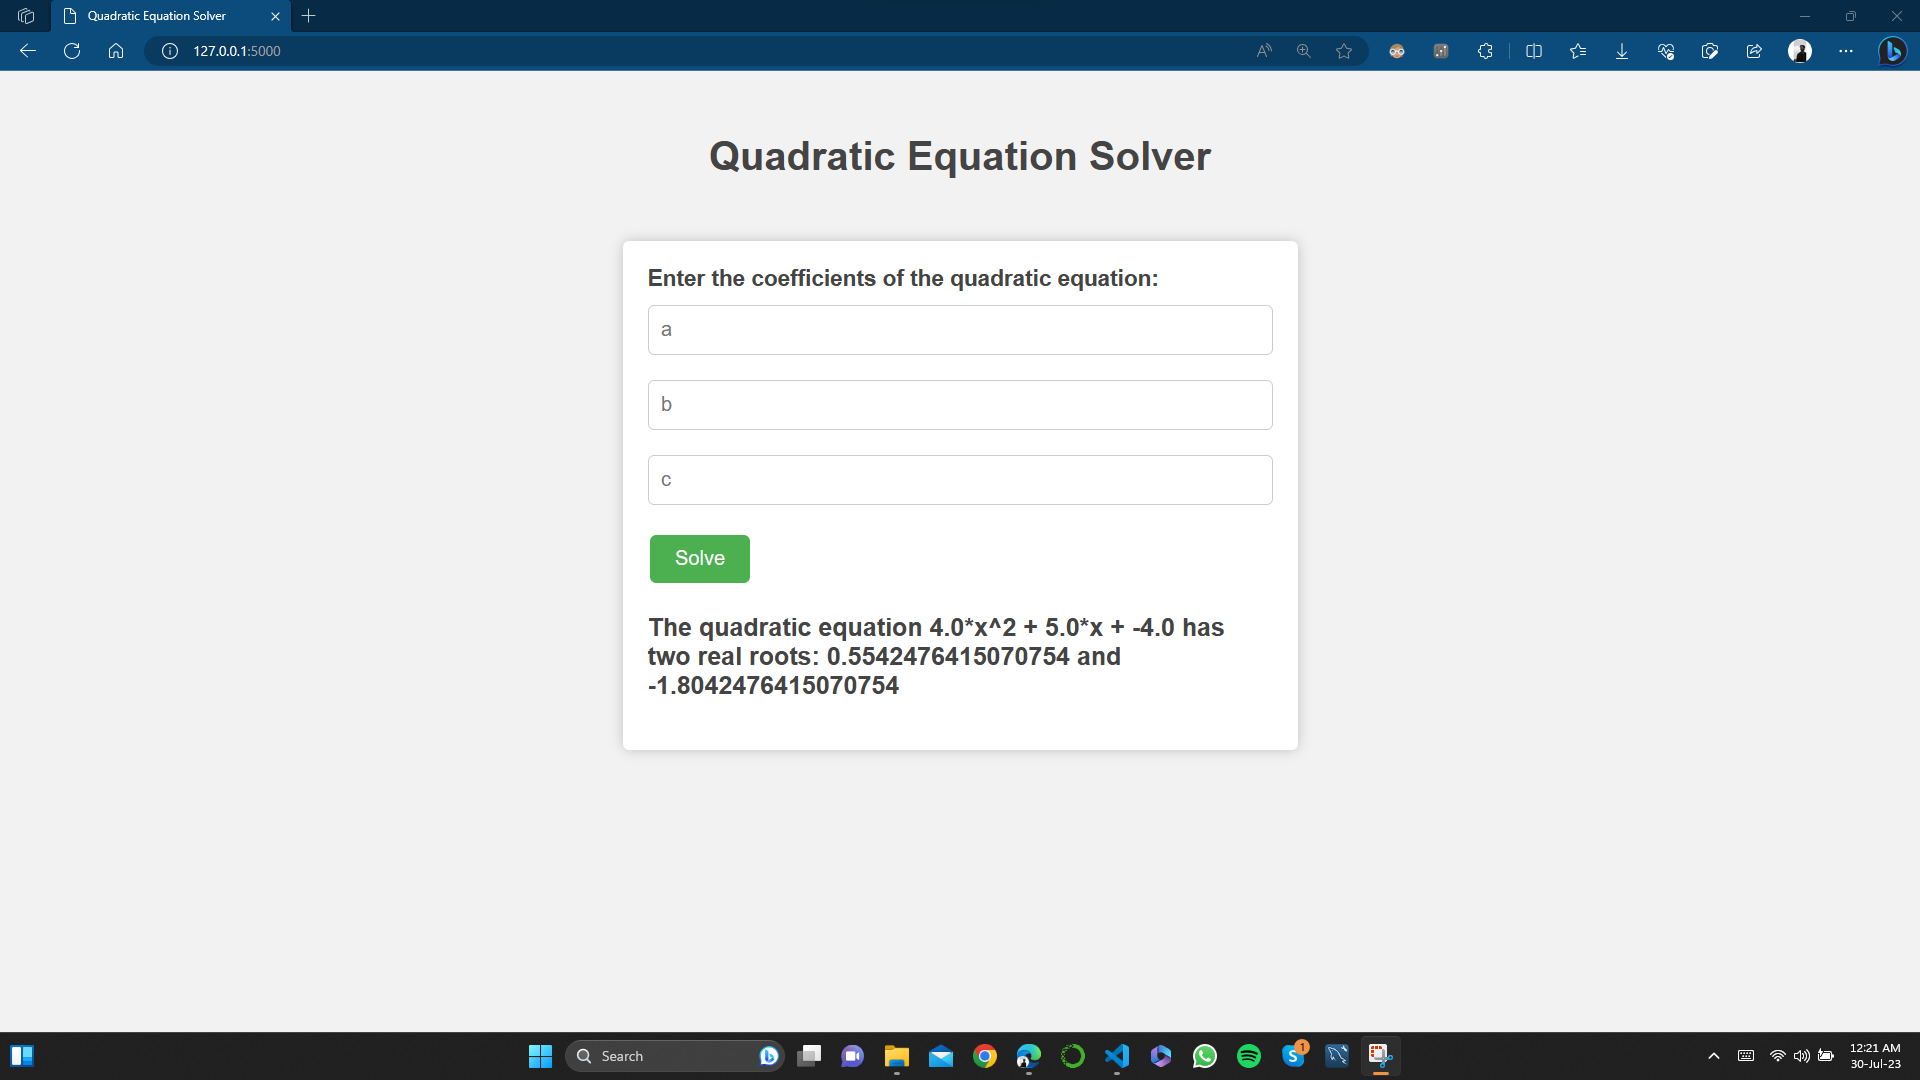

## Testing the API with postman

![Screenshot 2023-07-29 233909.png](<attachment:Screenshot 2023-07-29 233909.png>)
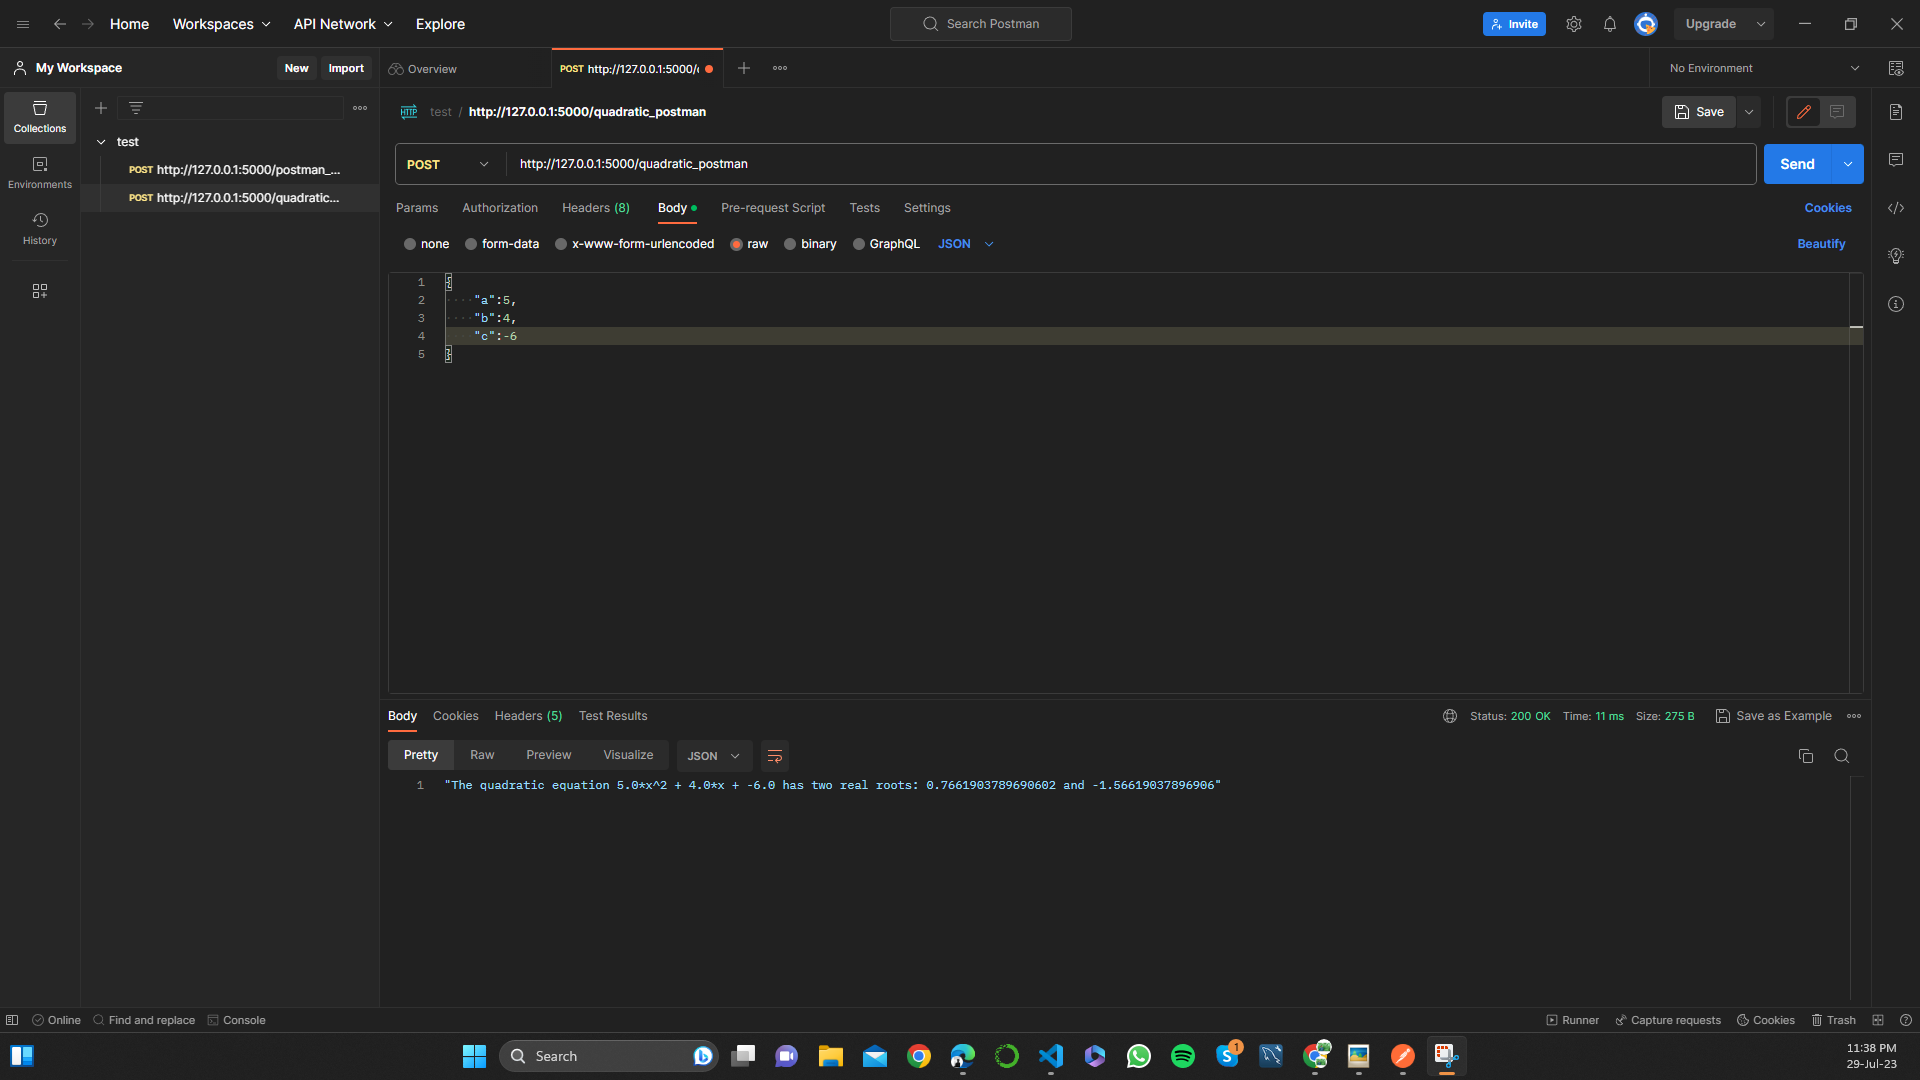